# Загрузка данных

https://www.kaggle.com/c/advanced-dls-spring-2021/overview - ссылка на соревнование

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eugenepakhomove","key":"d86a4795888f165794cb8b5866b6078e"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /content/kaggle.json
!kaggle competitions download -c advanced-dls-spring-2021

  0% 0.00/213k [00:00<?, ?B/s]
100% 213k/213k [00:00<00:00, 67.1MB/s]
  0% 0.00/14.4k [00:00<?, ?B/s]
100% 14.4k/14.4k [00:00<00:00, 35.4MB/s]
  0% 0.00/648k [00:00<?, ?B/s]
100% 648k/648k [00:00<00:00, 42.9MB/s]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_data=pd.read_csv('train.csv')

Выделим числовые и категориальные признаки

In [5]:
#числовые
num_cols=[
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]
#категориальные
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
train_data.head(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Видим что все строки non-null. Проверим на наличие пустых строк

In [8]:
for col in feature_cols:
    print(col,np.sum(train_data[col]==' '))

ClientPeriod 0
MonthlySpending 0
TotalSpent 9
Sex 0
IsSeniorCitizen 0
HasPartner 0
HasChild 0
HasPhoneService 0
HasMultiplePhoneNumbers 0
HasInternetService 0
HasOnlineSecurityService 0
HasOnlineBackup 0
HasDeviceProtection 0
HasTechSupportAccess 0
HasOnlineTV 0
HasMovieSubscription 0
HasContractPhone 0
IsBillingPaperless 0
PaymentMethod 0


Видим что в TotalSpent есть 9 пропусков. Посмотрим на эти строки

In [9]:
train_data[train_data['TotalSpent']==' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Сравним с ClientPeriod


In [10]:
train_data[train_data['ClientPeriod']==0]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Видим что это те же самые строки с пустым TotalSpent. Заполним пропуски 0, так как TotalSpent определяется ClientPeriod

In [11]:
train_data.at[train_data['TotalSpent']==' ','TotalSpent']=0
train_data[train_data['TotalSpent']==0]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,0,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,0,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,0,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,0,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [12]:
#переведём значения в численные
train_data['TotalSpent']=pd.to_numeric(train_data['TotalSpent'])

# Анализ данных

Построим гистограммы для численных признаков и круговые диаграммы для категориальных. Визуализируем распределение целевой переменной

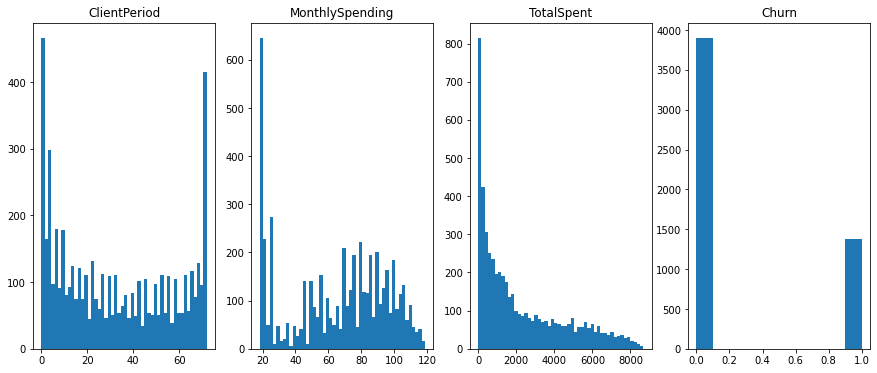

In [13]:
fig,ax=plt.subplots(1,4,figsize=(15,6))
for i in range(3):
    ax[i].hist(train_data[num_cols[i]],bins=50)
    ax[i].set_title(num_cols[i])
ax[3].hist(train_data['Churn'])
ax[3].set_title('Churn')
plt.show()

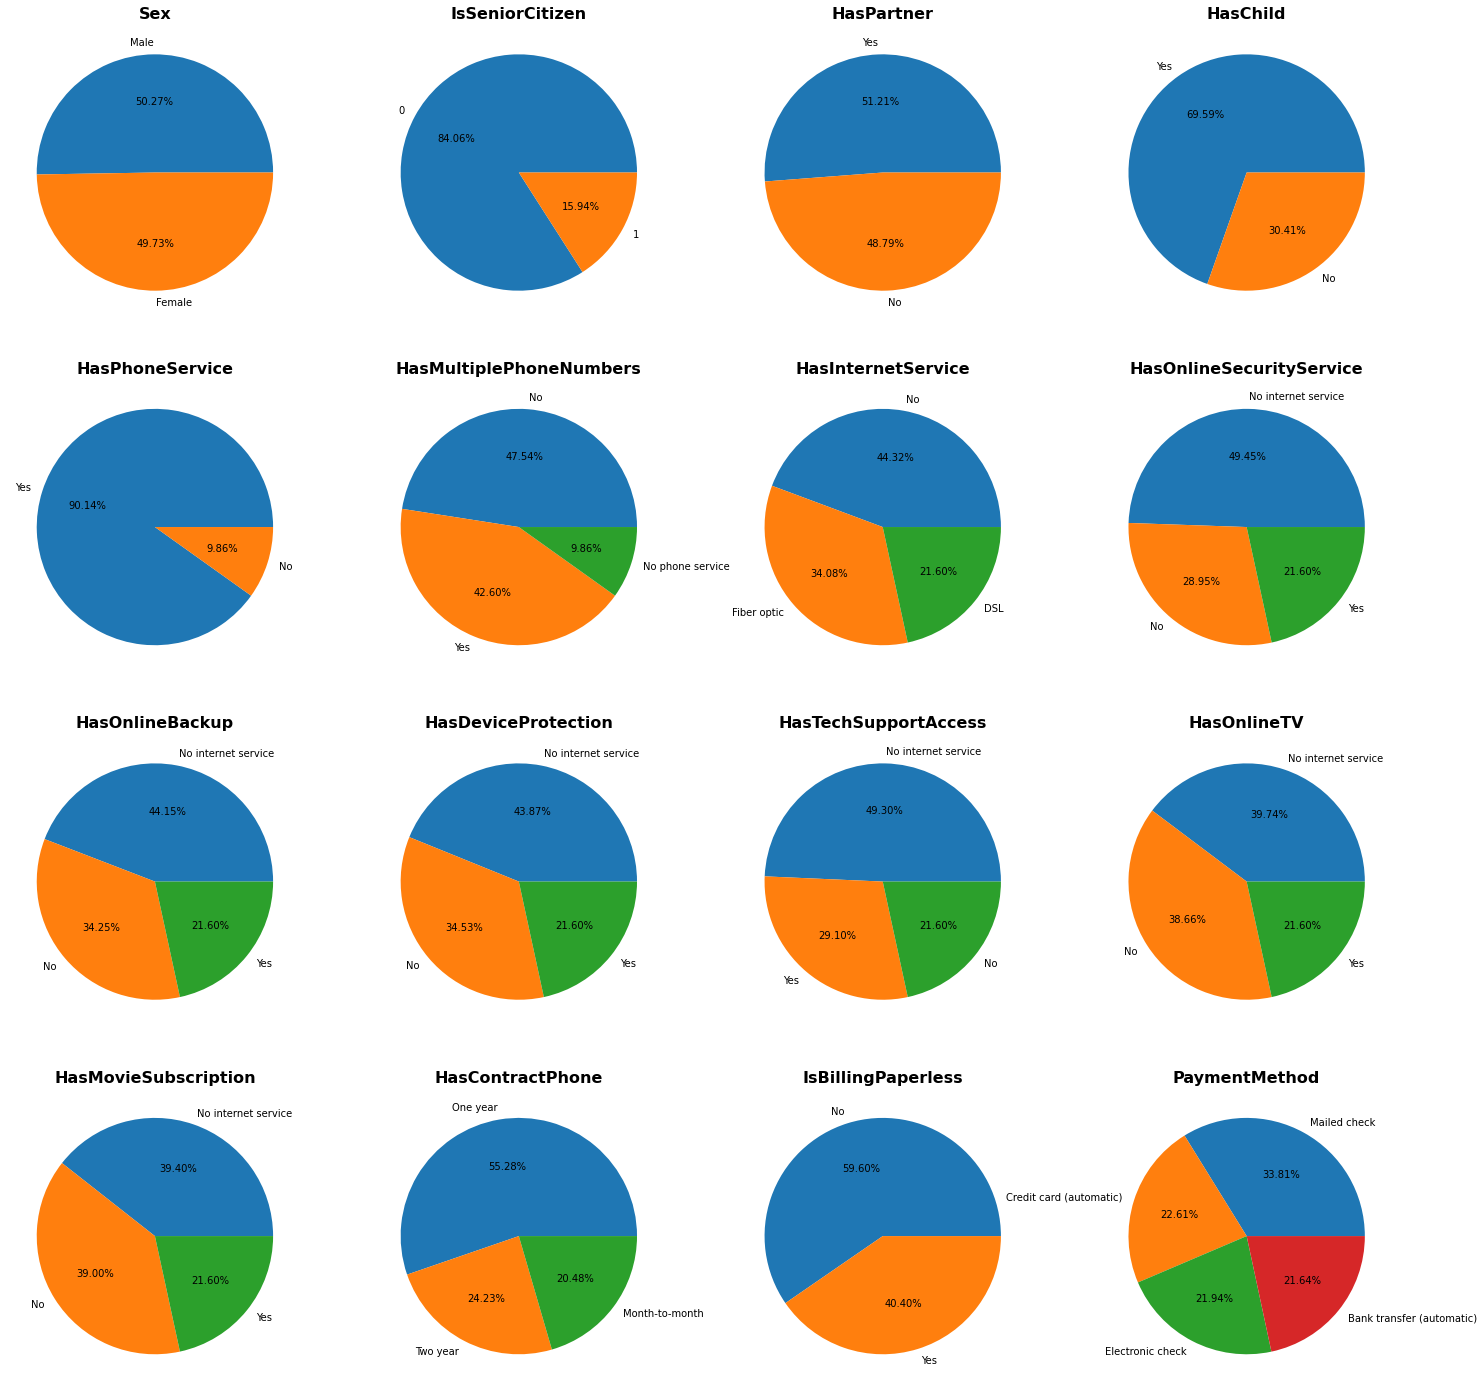

In [14]:
fig,ax=plt.subplots(4,4,figsize=(25,25))
ax=ax.ravel()
for i,col in enumerate(cat_cols):
    ax[i].pie(train_data[col].value_counts(),labels=train_data[col].unique(),autopct='%1.2f%%')
    ax[i].set_title(col,fontsize=16,fontweight='bold')

Посмотрим на распределение целевой переменной

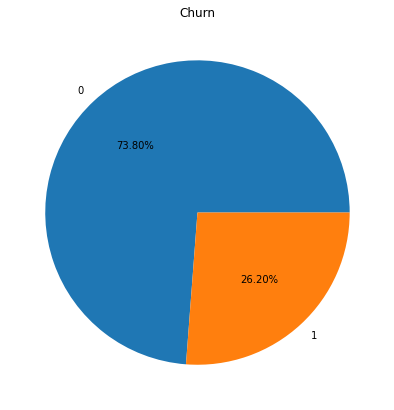

In [15]:
plt.figure(figsize=(10,7))
plt.pie(train_data["Churn"].value_counts(),labels=train_data["Churn"].unique(),autopct="%1.2f%%")
plt.title("Churn")
None

Классы неслабансированны, но не сильно

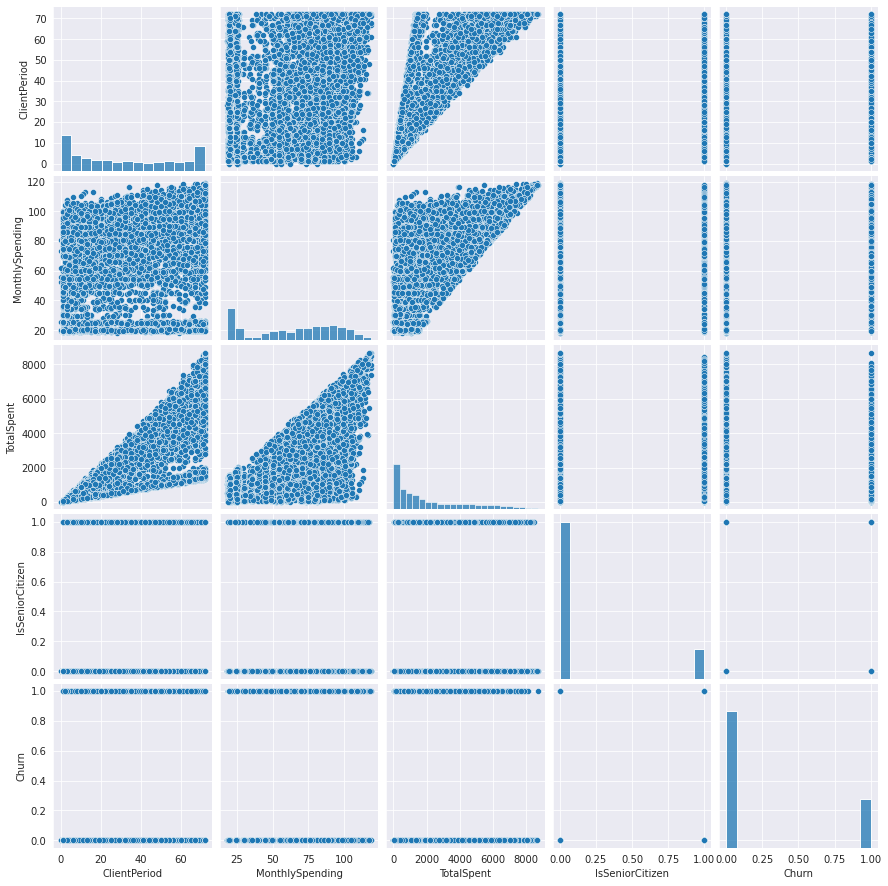

In [16]:
sns.set_style('darkgrid')
sns.pairplot(train_data)

# Линейные модели

Отнормируем числовые признаки, а категориальные закодируем с помощью one-hot-encoding. В качестве метрики выберем roc auc

In [35]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, roc_curve

In [18]:
%%time
transform=ColumnTransformer([('cat_transform',OneHotEncoder(),cat_cols),
                             ('num_transform',StandardScaler(),num_cols)])
pipe=make_pipeline(transform,LogisticRegression())
grid={
    'logisticregression__C':np.array([100, 10, 1, 0.1, 0.01,0.001,0.0001]),
    'logisticregression__penalty':np.array(['l2']),
    'logisticregression__solver':np.array(['newton-cg','lbfgs','sag']),
    'logisticregression__max_iter':np.array([100,200,300,400])
}
search=GridSearchCV(pipe,param_grid=grid,n_jobs=-1,cv=5,refit=True,scoring='roc_auc')
search.fit(train_data[num_cols+cat_cols],train_data[target_col])
print("Лучшие параметры:",search.best_params_)
print("Лучшее качество:",search.best_score_)

Лучшие параметры: {'logisticregression__C': 100.0, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'sag'}
Лучшее качество: 0.8451278315309244
CPU times: user 6.96 s, sys: 262 ms, total: 7.23 s
Wall time: 1min 1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


# Градиентный бустинг

В качестве библиотеки для градиентного бустинга будем использовать catboost. В нём не нужно кодировать категориальные признаки, а численные признаки нормировать для моделей, основанных на деревьях, не нужно

In [20]:
!pip install catboost

In [21]:
from catboost import CatBoostClassifier

In [22]:
X_train,X_test,y_train,y_test=train_test_split(
    train_data[feature_cols],train_data[target_col],random_state=42,test_size=0.2)

In [ ]:
boost_model=CatBoostClassifier(cat_features=cat_cols,random_seed=42,verbose=False,eval_metric="AUC:hints=skip_train~false")
grid={
    "n_estimators":[200,300],
    "learning_rate":[0.01,0.001,0.0001]
}
search_result=boost_model.grid_search(grid,X_train,y_train,refit=True,plot=True)

In [36]:
y_train_predicted = boost_model.predict_proba(X_train)[:, 1]
y_test_predicted = boost_model.predict_proba(X_test)[:, 1]

In [43]:
print("Лучшее качество: ",roc_auc_score(y_test,y_test_predicted))
print("Лучшие параметры: ",search_result['params'])

Лучшее качество:  0.8269756466970198
Лучшие параметры:  {'iterations': 300, 'learning_rate': 0.01}


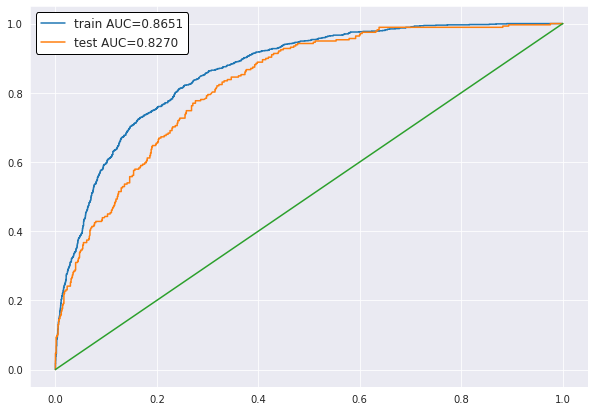

In [38]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

# Получение предсказаний


In [45]:
best_model=search
submission=pd.read_csv("submission.csv")
X_test=pd.read_csv('test.csv')

In [46]:
X_test=X_test.replace(" ",float('0'))
submission['Churn']=best_model.predict_proba(X_test)[:,1]
submission.to_csv('my_submission.csv', index=False)

# Результаты


Ниже представлены результаты сабмита на kaggle https://www.kaggle.com/c/advanced-dls-spring-2021/leaderboard

1.   Линейная регрессия - 0.84582

